# Parametros optimización de Modelos de Machine Learning

En este notebook exploraremos conceptos clave relacionados con la optimización de modelos de Machine Learning, como la función de pérdida, la función de coste, el gradiente y la importancia de la tasa de aprendizaje en el descenso de gradiente.

---

## 1. Objetivo del Notebook

En este notebook analizaremos la evolución de un modelo de regresión lineal para diferentes tasas de aprendizaje y visualizaremos cómo cambian las predicciones a lo largo de las iteraciones. Finalmente, compararemos la evolución de la función de coste para cada tasa de aprendizaje.

---

## 2. Conceptos clave

### **Función de pérdida vs Función de coste**
- **Función de pérdida:** Evalúa el error del modelo para una única muestra de entrenamiento.  
  Ejemplo común: **Error cuadrático medio (MSE)**, que mide la diferencia entre la predicción y el valor real.

$[
\mathcal{L}(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2
$]

- **Función de coste:** Es la media de la función de pérdida sobre todas las muestras del conjunto de datos. Minimizar la función de coste es el objetivo del entrenamiento del modelo.

$[
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$]

---

### **Gradiente y función de coste**

La gradiente y la función de coste son herramientas clave en el proceso de optimización, pero por sí solas no controlan directamente la tasa de aprendizaje, y por ende, no pueden evitar que el modelo diverja cuando se elige un valor de la tasa de aprendizaje demasiado alto.

#### **El rol del gradiente**
El gradiente es simplemente un indicador de la pendiente de la función de coste en un punto específico. Muestra la dirección y magnitud en la que se deben ajustar los parámetros del modelo para minimizar la función de coste.

- El gradiente indica la dirección de ajuste, pero no controla el tamaño del paso.
- La tasa de aprendizaje $( \alpha $) es la que determina cuánto se ajustan los parámetros del modelo en cada iteración.

#### **La función de coste**
La función de coste evalúa cuán lejos está el modelo de la solución óptima. Sin embargo, aunque disminuya, no garantiza que el modelo esté convergiendo correctamente si la tasa de aprendizaje es demasiado grande.

---

### **Descenso de gradiente y tasa de aprendizaje**

Es un algoritmo iterativo que actualiza los parámetros del modelo en la dirección opuesta al gradiente para minimizar la función de coste.

$[
\theta_{\text{nueva}} = \theta_{\text{anterior}} - \alpha \nabla J(\theta)
$]

Donde:  
- $( \theta $) son los parámetros del modelo.  
- $( \alpha $) es la tasa de aprendizaje.  
- $( \nabla J(\theta) $) es el gradiente.

---

### **Efecto de una tasa de aprendizaje alta**

Si la tasa de aprendizaje $( \alpha $) es demasiado grande, el algoritmo puede divergir en lugar de converger. Esto sucede porque los "pasos" de actualización son demasiado grandes, lo que provoca que el modelo no pueda minimizar la función de coste de manera efectiva.  

#### **Problemas de una tasa de aprendizaje alta:**

1. **Saltos excesivos:**  
   - La actualización de los parámetros puede ser demasiado agresiva, llevando a valores subóptimos.  
   - En lugar de acercarse al mínimo óptimo, el modelo oscila o diverge.

2. **Oscilaciones:**  
   - Cuando el algoritmo da pasos grandes, los parámetros rebotan de un lado a otro sin estabilizarse.  

3. **Divergencia:**  
   - Si el modelo no converge, el error en la función de coste se incrementa en lugar de disminuir.  

---

### **Mecanismos para mitigar la divergencia**

Algunas estrategias para mitigar los problemas de una tasa de aprendizaje alta incluyen:

- **Tasa de aprendizaje adaptativa** (como Adam, AdaGrad, etc.).
- **Reducción gradual de la tasa de aprendizaje.**
- **Normalización de gradientes** para evitar pasos excesivamente grandes.

---

### **Resumen**

La función de coste y el gradiente son herramientas para indicar el error y cómo deben cambiar los parámetros del modelo, pero no tienen control sobre el tamaño de los pasos que se dan en el proceso de optimización. La tasa de aprendizaje es el parámetro crucial que regula ese tamaño de paso, y cuando se selecciona un valor inapropiado, los métodos de optimización pueden perder el rumbo.



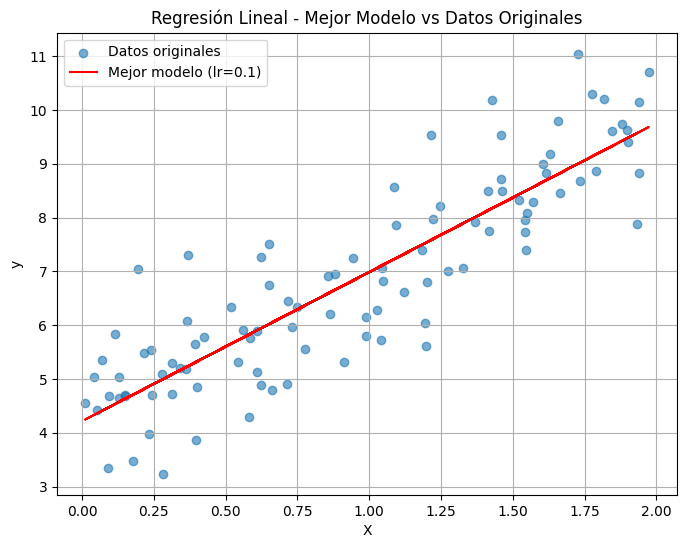

Parámetros óptimos: [[4.21509609]
 [2.77011344]]
Resultados de la regresión lineal con scikit-learn: [4.21509616] [[2.77011339]]


In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generación de datos sintéticos
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Agregar columna de 1s para el término de sesgo (X_b = matriz extendida)
X_b = np.c_[np.ones((100, 1)), X]

# Función de predicción
def predict(X, theta):
    return X.dot(theta)

# Función de coste (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Descenso de gradiente
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        gradients = (1 / m) * X.T.dot(predict(X, theta) - y)
        theta -= learning_rate * gradients
    return theta

# Parámetros óptimos usando la mejor tasa de aprendizaje (0.1)
learning_rate = 0.1
iterations = 1000
theta_init = np.random.randn(2, 1)

theta_optimal = gradient_descent(X_b, y, theta_init, learning_rate, iterations)
y_pred = predict(X_b, theta_optimal)

# Gráfico de dispersión con la mejor línea de ajuste
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Datos originales", alpha=0.6)
plt.plot(X, y_pred, color='red', label="Mejor modelo (lr=0.1)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresión Lineal - Mejor Modelo vs Datos Originales")
plt.legend()
plt.grid(True)
plt.show()

print("Parámetros óptimos:",    theta_optimal)

lr=LinearRegression()
lr.fit(X, y)
print("Resultados de la regresión lineal con scikit-learn:",lr.intercept_,lr.coef_)


Si queremos evaluar los modelos según learning_rate:

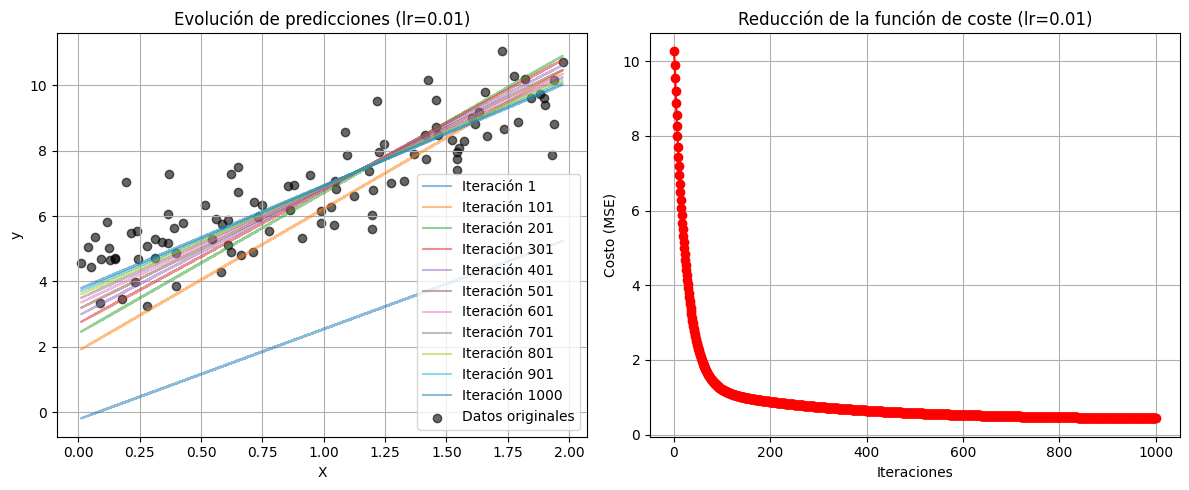

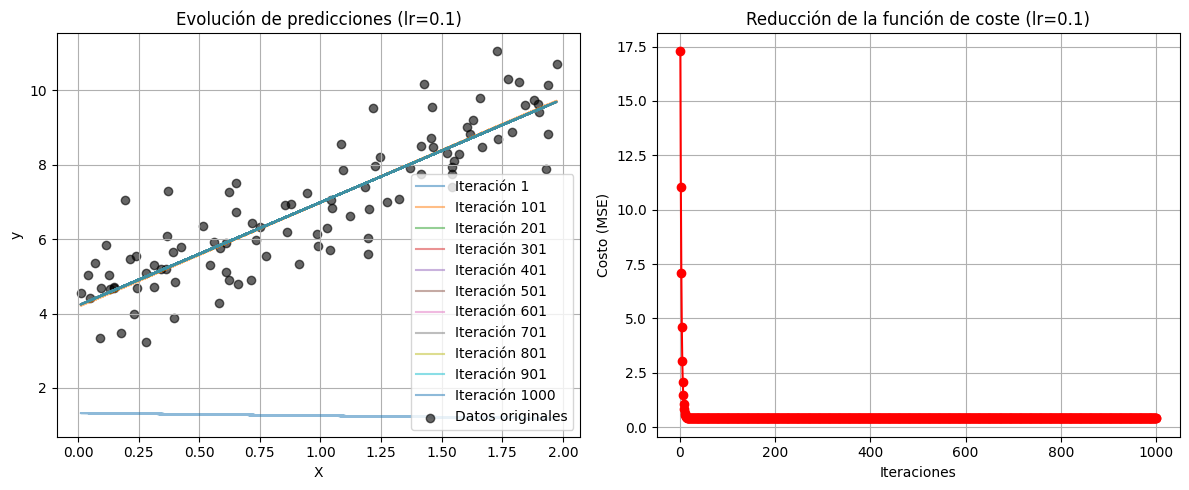

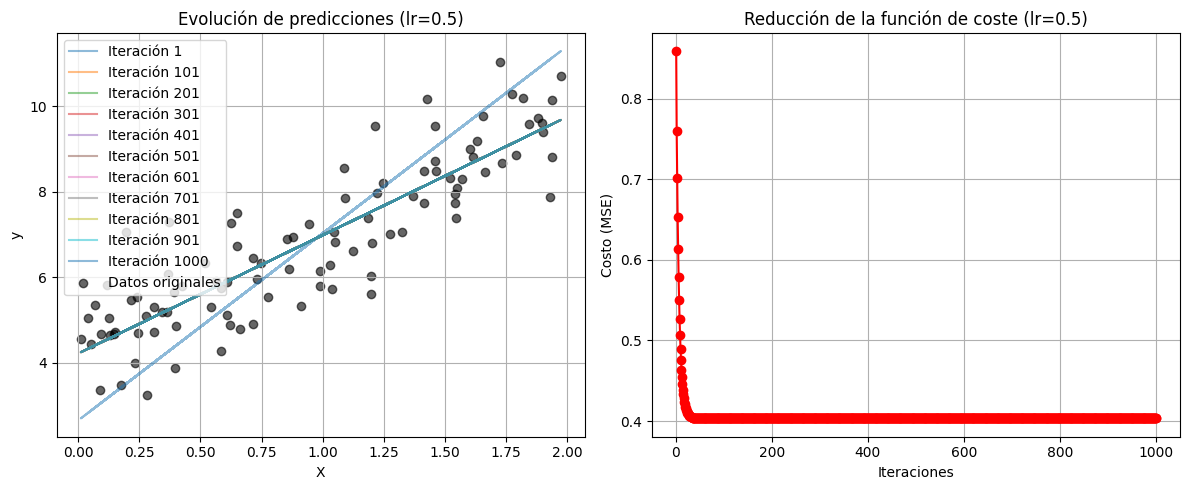

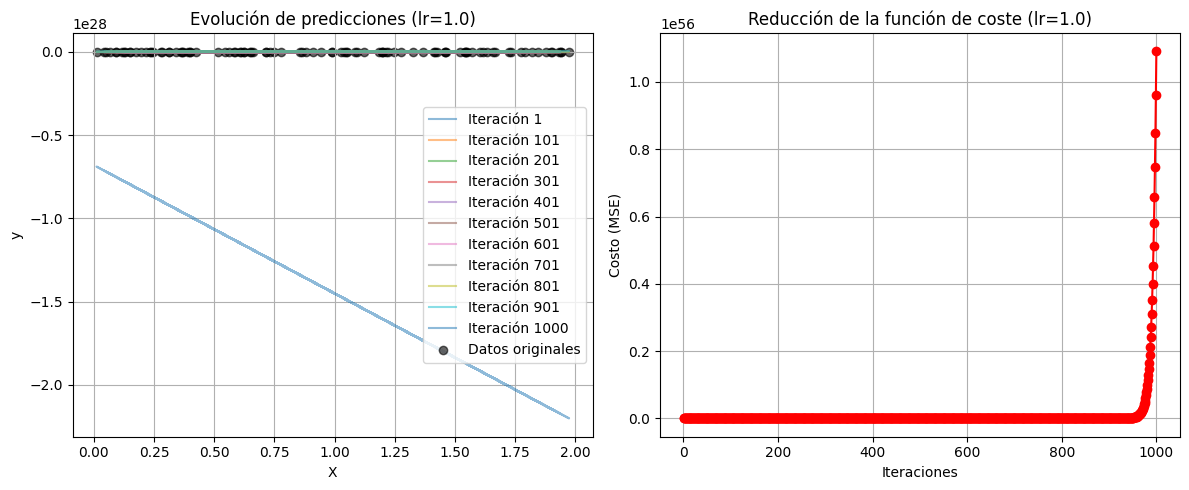

In [107]:

# Diferentes tasas de aprendizaje a probar
learning_rates = [0.01, 0.1, 0.5, 1.0]
iterations = 1000  # Reducimos el número de iteraciones para ver la evolución más claramente
# Crear gráficos individuales para cada tasa de aprendizaje con evolución del gradiente
for lr in learning_rates:
    theta = np.random.randn(2, 1)  # Re-iniciar los pesos para cada tasa de aprendizaje
    
    # Listas para almacenar la evolución de la función de coste
    cost_history = []
    
    plt.figure(figsize=(12, 5))

    # Subgráfico 1: Evolución de predicciones
    plt.subplot(1, 2, 1)
    for i in range(iterations):
        theta = gradient_descent(X_b, y, theta, lr, 1)  # Aplicamos una iteración a la vez
        y_pred = predict(X_b, theta)
        
        # Calcular el coste y almacenarlo
        cost = compute_cost(X_b, y, theta)
        cost_history.append(cost)

        # Mostrar solo algunas iteraciones para mejor visualización
        if i % 100 == 0 or i == iterations - 1:
            plt.plot(X, y_pred, label=f"Iteración {i+1}", alpha=0.5)

    # Datos originales
    plt.scatter(X, y, label="Datos originales", alpha=0.6, color='black')
    plt.title(f"Evolución de predicciones (lr={lr})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    # Subgráfico 2: Evolución de la función de coste (gradiente)
    plt.subplot(1, 2, 2)
    plt.plot(range(1, iterations + 1), cost_history, marker='o', linestyle='-', color='red')
    plt.title(f"Reducción de la función de coste (lr={lr})")
    plt.xlabel("Iteraciones")
    plt.ylabel("Costo (MSE)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()



Implementación de Adam
Adam es uno de los optimizadores más populares porque combina las ventajas de dos enfoques: AdaGrad y RMSProp. Ajusta la tasa de aprendizaje de cada parámetro de manera independiente, utilizando tanto el primer momento (media) como el segundo momento (varianza).

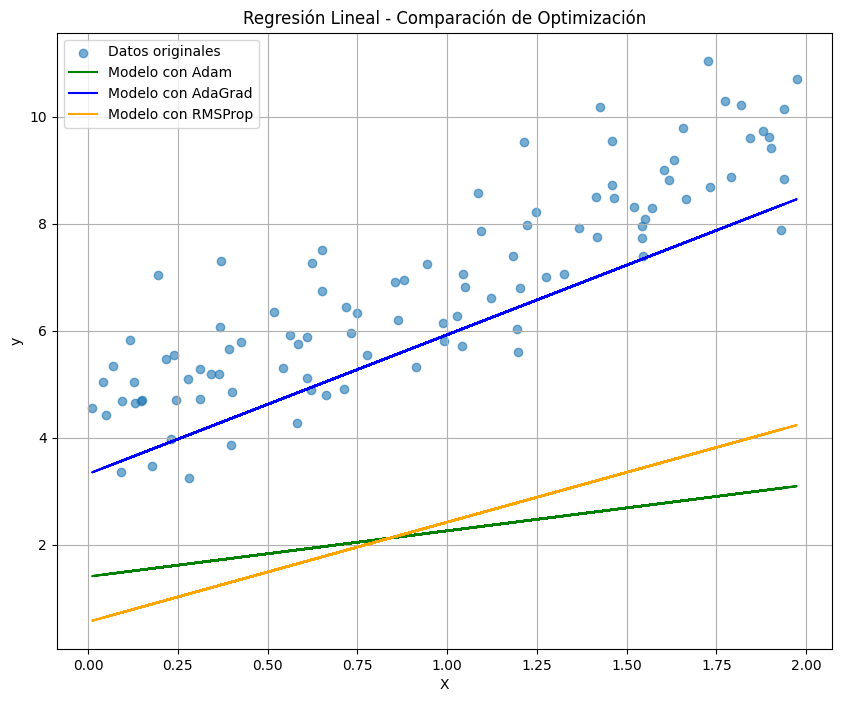

El óptimo de Adam [[1.40409118]
 [0.85620312]]
El óptimo de Adagrad [[3.32366395]
 [2.60011657]]
El óptimo de rmsprop [[0.55944132]
 [1.86206835]]


In [108]:
# # Generación de datos sintéticos
# np.random.seed(42)
# X = 2 * np.random.rand(100, 1)
# y = 4 + 3 * X + np.random.randn(100, 1)

# Agregar columna de 1s para el término de sesgo (X_b = matriz extendida)
X_b = np.c_[np.ones((100, 1)), X]

# Función de predicción
def predict(X, theta):
    return X.dot(theta)

# Función de coste (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Optimización con Adam
def adam_optimizer(X, y, theta, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, iterations=1000):
    m = len(y)
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
    t = 0
    
    for i in range(iterations):
        t += 1
        gradients = (1 / m) * X.T.dot(predict(X, theta) - y)
        
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * gradients ** 2
        
        m_t_hat = m_t / (1 - beta1 ** t)
        v_t_hat = v_t / (1 - beta2 ** t)
        
        theta -= learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)
    
    return theta

# Optimización con AdaGrad
def adagrad_optimizer(X, y, theta, learning_rate=0.1, epsilon=1e-8, iterations=1000):
    m = len(y)
    G = np.zeros_like(theta)
    
    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(predict(X, theta) - y)
        G += gradients ** 2
        theta -= (learning_rate / (np.sqrt(G) + epsilon)) * gradients
    
    return theta

# Optimización con RMSProp
def rmsprop_optimizer(X, y, theta, learning_rate=0.001, beta=0.9, epsilon=1e-8, iterations=1000):
    m = len(y)
    G = np.zeros_like(theta)
    
    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(predict(X, theta) - y)
        G = beta * G + (1 - beta) * gradients ** 2
        theta -= (learning_rate / (np.sqrt(G) + epsilon)) * gradients
    
    return theta

# Parámetros iniciales
theta_init = np.random.randn(2, 1)

# Optimización con Adam
theta_optimal_adam = adam_optimizer(X_b, y, theta_init.copy(), learning_rate=0.001, iterations=1000)
y_pred_adam = predict(X_b, theta_optimal_adam)

# Reiniciar theta_init
theta_init = np.random.randn(2, 1)

# Optimización con AdaGrad
theta_optimal_adagrad = adagrad_optimizer(X_b, y, theta_init.copy(), learning_rate=0.1, iterations=1000)
y_pred_adagrad = predict(X_b, theta_optimal_adagrad)

# Reiniciar theta_init
theta_init = np.random.randn(2, 1)

# Optimización con RMSProp
theta_optimal_rmsprop = rmsprop_optimizer(X_b, y, theta_init.copy(), learning_rate=0.001, iterations=1000)
y_pred_rmsprop = predict(X_b, theta_optimal_rmsprop)

# Gráfico comparativo
plt.figure(figsize=(10, 8))
plt.scatter(X, y, label="Datos originales", alpha=0.6)
plt.plot(X, y_pred_adam, color='green', label="Modelo con Adam")
plt.plot(X, y_pred_adagrad, color='blue', label="Modelo con AdaGrad")
plt.plot(X, y_pred_rmsprop, color='orange', label="Modelo con RMSProp")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresión Lineal - Comparación de Optimización")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar los parámetros óptimos obtenidos por cada optimizador
print('El óptimo de Adam', theta_optimal_adam)
print('El óptimo de Adagrad', theta_optimal_adagrad)
print('El óptimo de rmsprop', theta_optimal_rmsprop)
